<a href="https://colab.research.google.com/github/plaban1981/Deep-Learning-KERAS/blob/master/Selecting_hidden_layers_in_a_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to select number of hidden layers and neurons in a neural network.

## Intution :-
Understand how we can perform hyperparameter optimization on an Artificial Neural Network.

## Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#keras Libraries
from keras import Sequential
from keras.layers import Dense,Activation,Embedding,Flatten,LeakyReLU,BatchNormalization,Dropout
from keras.activations import relu,sigmoid


In [2]:
#from google.colab import files
#files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


{'Churn_Modelling.csv': b"RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited\r\n1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n12,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n13,15632264,Kay,476,France,Female,

## Load training dat into pandas dataframe

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Importing the required predictors

In [5]:
X = df.iloc[:, 3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


# importing the Label

In [7]:
Y = df.iloc[:,13]
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## information about the Schema

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.3+ KB


## One hot encoding Categorical Predictors

In [0]:
X_one_hot = pd.get_dummies(X[['Geography','Gender']])

In [12]:
X_one_hot.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0


In [0]:
X = pd.concat([X,X_one_hot],axis=1)

In [14]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [15]:
X = X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


## Splitting the dataset into the Training set and Test set

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(8000, 13) (8000,)
(2000, 13) (2000,)


## Normalizing the input predictors

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Finding the optimum patameters for classification

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

## Create a function to build the Kears Model

In [0]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1)) # Note: no activation beyond this point as thus is the final out put layer to predict whether a customer will exit or not
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [0]:
model = KerasClassifier(build_fn=create_model, verbose=1)

In [26]:
model

In [0]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])

In [28]:
param_grid

{'activation': ['sigmoid', 'relu'],
 'batch_size': [128, 256],
 'epochs': [30],
 'layers': [[20], [40, 20], [45, 30, 15]]}

In [0]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [30]:
grid_results = grid.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
W0714 15:36:12.496189 140044574766976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 15:36:12.532400 140044574766976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 15:36:12.539390 140044574766976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0714 15:36:12.567048 1400445747669

Epoch 1/30
5333/5333 [==============================] - 4s 747us/step - loss: 3.2460 - acc: 0.6115
Epoch 2/30
5333/5333 [==============================] - 0s 24us/step - loss: 3.2460 - acc: 0.6000
Epoch 3/30
5333/5333 [==============================] - 0s 24us/step - loss: 3.2460 - acc: 0.5995
Epoch 4/30
5333/5333 [==============================] - 0s 25us/step - loss: 3.2460 - acc: 0.5995
Epoch 5/30
5333/5333 [==============================] - 0s 23us/step - loss: 3.2460 - acc: 0.5995
Epoch 6/30
5333/5333 [==============================] - 0s 24us/step - loss: 3.2460 - acc: 0.5995
Epoch 7/30
5333/5333 [==============================] - 0s 24us/step - loss: 3.2460 - acc: 0.5995
Epoch 8/30
5333/5333 [==============================] - 0s 26us/step - loss: 3.2460 - acc: 0.5995
Epoch 9/30
5333/5333 [==============================] - 0s 25us/step - loss: 3.2460 - acc: 0.5995
Epoch 10/30
5333/5333 [==============================] - 0s 23us/step - loss: 3.2460 - acc: 0.5995
Epoch 11/30
5333/5

In [32]:
grid_results.best_score_

0.8408750001341104

In [33]:
grid_results.best_params_

{'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [40, 20]}

In [34]:
y_pred = grid.predict(X_test)

2000/2000 [==============================] - 1s 533us/step


In [0]:
y_pred = [x[0] for x in y_pred]

In [39]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [41]:
y_test.values[:5]

array([0, 0, 0, 0, 0])

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values, y_pred)

In [44]:
print(cm)

[[1520   65]
 [ 277  138]]


In [0]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [47]:
print('Accuracy_Score = {}%'.format(np.round(score * 100.0),2))

Accuracy_Score = 83.0%


In [49]:
!pip install scikit-plot

## Visualizing Confusion Matrix

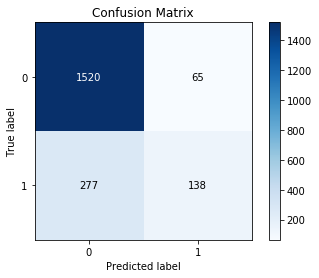

In [52]:
import scikitplot 
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)

## ROC curve Visualiztaion

In [55]:
y_pred_proba = grid.predict_proba(X_test)

2000/2000 [==============================] - 0s 13us/step


In [74]:
y_pred_proba

array([[ 0.91556025,  0.08443976],
       [ 0.84081185,  0.15918814],
       [ 0.8916594 ,  0.10834061],
       ...,
       [ 1.0784167 , -0.07841673],
       [ 0.8698776 ,  0.13012241],
       [ 0.5315225 ,  0.46847752]], dtype=float32)

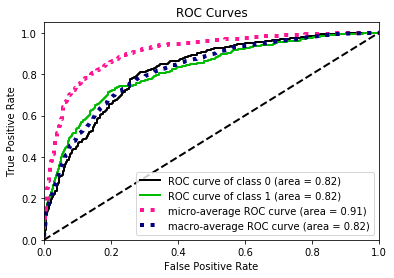

In [56]:
scikitplot.metrics.plot_roc(y_test,y_pred_proba)

## Trying tho build the keras model with grid.best_params_

In [57]:
grid_results.best_params_

{'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [40, 20]}

In [60]:
model = Sequential()
#layer1
model.add(Dense(40,input_dim=X_train.shape[1]))
model.add(Activation('relu'))
#layer2
model.add(Dense(20))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 40)                560       
_________________________________________________________________
activation_79 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 20)                820       
_________________________________________________________________
activation_80 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_120 (Dense)            (None, 1)                 21        
Total params: 1,401
Trainable params: 1,401
Non-trainable params: 0
_________________________________________________________________


In [61]:
hist = model.fit(X_train,y_train,epochs=30,batch_size=128,verbose=1,validation_data=(X_test,y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 3s 354us/step - loss: 0.5783 - acc: 0.7916 - val_loss: 0.5086 - val_acc: 0.7990
Epoch 2/30
8000/8000 [==============================] - 0s 36us/step - loss: 0.4650 - acc: 0.8060 - val_loss: 0.4345 - val_acc: 0.8080
Epoch 3/30
8000/8000 [==============================] - 0s 34us/step - loss: 0.4483 - acc: 0.8029 - val_loss: 0.4180 - val_acc: 0.8180
Epoch 4/30
8000/8000 [==============================] - 0s 33us/step - loss: 0.4428 - acc: 0.8196 - val_loss: 0.4178 - val_acc: 0.8130
Epoch 5/30
8000/8000 [==============================] - 0s 32us/step - loss: 0.4315 - acc: 0.8197 - val_loss: 0.4564 - val_acc: 0.8270
Epoch 6/30
8000/8000 [==============================] - 0s 35us/step - loss: 0.4429 - acc: 0.8214 - val_loss: 0.4728 - val_acc: 0.8155
Epoch 7/30
8000/8000 [==============================] - 0s 32us/step - loss: 0.4241 - acc: 0.8226 - val_loss: 0.4252 - val_acc: 0.8255
Epoch 

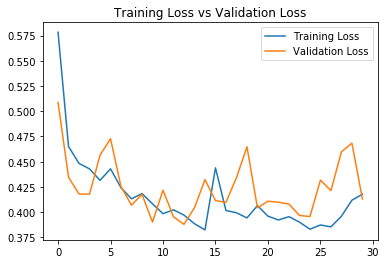

In [65]:
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label ='Validation Loss')
plt.legend()
plt.title('Training Loss vs Validation Loss')
plt.show()

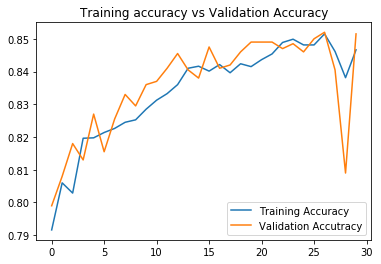

In [66]:
plt.plot(hist.history['acc'],label='Training Accuracy')
plt.plot(hist.history['val_acc'],label ='Validation Accutracy')
plt.legend()
plt.title('Training accuracy vs Validation Accuracy')
plt.show()

In [0]:
pred_proba = model.predict(X_test)

In [68]:
pred_proba

array([[0.14107805],
       [0.14051774],
       [0.196845  ],
       ...,
       [0.02298401],
       [0.08758315],
       [0.27055222]], dtype=float32)

In [0]:
pred = []
for x in pred_proba:
  if x > 0.5 :
    pred.append(1)
  else:
    pred.append(0)

In [73]:
print('Accuracy_Score {}%'.format(np.round(accuracy_score(y_test,pred)*100,2)))

Accuracy_Score 85.15%


In [0]:
proba = []
for i in pred_proba:
  proba.append([1-i,i])

In [76]:
proba

[[array([0.85892195], dtype=float32), array([0.14107805], dtype=float32)],
 [array([0.8594823], dtype=float32), array([0.14051774], dtype=float32)],
 [array([0.803155], dtype=float32), array([0.196845], dtype=float32)],
 [array([0.97609925], dtype=float32), array([0.02390077], dtype=float32)],
 [array([0.7777201], dtype=float32), array([0.22227994], dtype=float32)],
 [array([0.76255506], dtype=float32), array([0.23744494], dtype=float32)],
 [array([0.6688471], dtype=float32), array([0.33115295], dtype=float32)],
 [array([0.9688495], dtype=float32), array([0.0311505], dtype=float32)],
 [array([0.6235297], dtype=float32), array([0.37647036], dtype=float32)],
 [array([0.99677956], dtype=float32), array([0.00322045], dtype=float32)],
 [array([0.6978739], dtype=float32), array([0.3021261], dtype=float32)],
 [array([0.80000925], dtype=float32), array([0.19999072], dtype=float32)],
 [array([0.7597654], dtype=float32), array([0.24023458], dtype=float32)],
 [array([0.9191098], dtype=float32), a

## Confusion Matrix

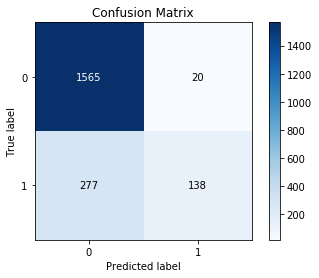

In [78]:
scikitplot.metrics.plot_confusion_matrix(y_test,pred)

## ROC curve

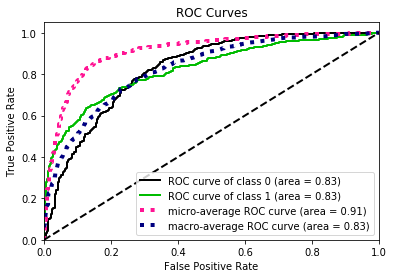

In [77]:
scikitplot.metrics.plot_roc(y_test,proba)